# Assignment: Final Project
# Class: DSC 550
# Name: Wittlieff, Harlan
# Date: 2/6/2022

# Project Milestone 1: Data Selection and EDA

Many creative individuals dream of pitching their ideas for the next big television show to the major players at Netflix. These creators hope for the success of television series legends such as "Law & Order," "Game of Thrones," "Breaking Bad," "The Office", and the longest running show with thirty-three seasons, "The Simpsons." 

However, before green lighting a new show, Netflix must evaluate key factors to attempt to predict whether the tv series will be a smash hit that their audiences will select for viewing out of Netflix's massive catalog. One of these factors that must be considered is the cost of production. When estimating the total costs of producing the television series, Netflix would likely require a solid prediction and understanding of for how many seasons the television series will run. 

Through the meticulous analysis of historical television series performance data, Netflix may be able to predict for how many seasons their latest venture is anticipated to run. To achieve this goal, I begin with the Netflix Movies and TV Shows dataset on Kaggle. The data must be cleaned and the movie data removed. This step will leave only data on television shows. A new column must be added to call out the number of seasons that the series ran. 

Once the data is ready for analysis, numerous variables may be plotted to look for trends, correlation, and possibly establish causation. The trends in series runtime can be reviewed in a timeline looking back many years based on release year. Additionally, an average number of seasons by year may be calculated. The variable of TV ratings may also be investigated for a relation to the number of seasons. Finally, the data should also be reviewed for outliers through a box plot. 

With this analysis, I then plan to work towards determining whether the television series description can be linked to predicted series runtime in number of seasons. A regression model will be used from Netflix data to predict the total number of seasons.

## EDA

### Data import & cleaning

In [3]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the datafile
df = pd.read_csv(r'Data/netflix_titles.csv')

# Validate the data loaded correctly
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Keep only type="TV Show" from the original data
df = df[df['type']=='TV Show']

# Validate transformation
df['type'].unique()

array(['TV Show'], dtype=object)

In [6]:
# Create a new column for number of seasons
df['seasons'] = df['duration'].str.split(' ').str[0].astype(int)

# Validate transformation
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,seasons
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,1


### Release Year vs Number of Seasons

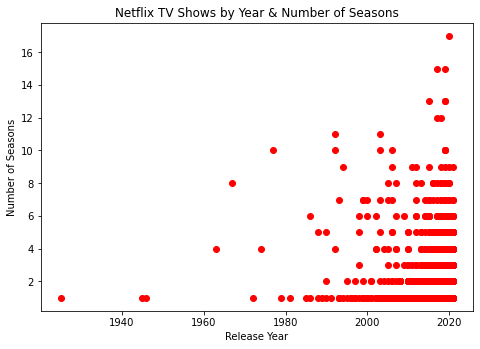

In [7]:
# Create a scatter plot of release_year vs seasons
fig=plt.figure()
ax=fig.add_axes([0, 0, 1, 1])
ax.scatter(df['release_year'], df['seasons'], color='r')
ax.set_xlabel('Release Year')
ax.set_ylabel('Number of Seasons')
ax.set_title('Netflix TV Shows by Year & Number of Seasons')
plt.show()

This first graph simply charts the number of seasons & year of release for each TV show in Netflix's library. As time has progressed, more TV shows are made with wider distribution in their overall number of seasons

### Rating vs Number of Seasons

In [8]:
# Obtain the number of occurences of each rating
df['rating'].value_counts()

TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

Note: NR, R, & TV-Y7-FV will be excluded due to their low number of occurences

In [9]:
# Seperate seasons by tv rating
tvma = df.loc[df['rating'] == 'TV-MA','seasons']
tv14 = df.loc[df['rating'] == 'TV-14','seasons']
tvy7 = df.loc[df['rating'] == 'TV-Y7','seasons']
tvy = df.loc[df['rating'] == 'TV-Y','seasons']
tv6 = df.loc[df['rating'] == 'TV-G','seasons']

<function matplotlib.pyplot.show(close=None, block=None)>

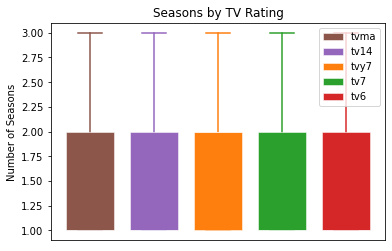

In [10]:
# Create Box Plot of seasons by rating
fix, ax = plt.subplots()
tvma_bp = ax.boxplot(tvma, positions=[2], widths = 1.5, patch_artist=True,
                showmeans=False, showfliers=False, medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C5", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C5", "linewidth": 1.5},
                capprops={"color": "C5", "linewidth": 1.5})
tv14_bp = ax.boxplot(tv14, positions=[4], widths = 1.5, patch_artist=True,
                showmeans=False, showfliers=False, medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C4", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C4", "linewidth": 1.5},
                capprops={"color": "C4", "linewidth": 1.5})
tvy7_bp = ax.boxplot(tvy7, positions=[6], widths = 1.5, patch_artist=True,
                showmeans=False, showfliers=False, medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C1", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C1", "linewidth": 1.5},
                capprops={"color": "C1", "linewidth": 1.5})
tv7_bp = ax.boxplot(tvy, positions=[8], widths = 1.5, patch_artist=True,
                showmeans=False, showfliers=False, medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C2", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C2", "linewidth": 1.5},
                capprops={"color": "C2", "linewidth": 1.5})
tv6_bp = ax.boxplot(tv6, positions=[10], widths = 1.5, patch_artist=True,
                showmeans=False, showfliers=False, medianprops={"color": "white", "linewidth": 0.5},
                boxprops={"facecolor": "C3", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C3", "linewidth": 1.5},
                capprops={"color": "C3", "linewidth": 1.5})
ax.axes.xaxis.set_visible(False)
ax.axes.set_ylabel('Number of Seasons')
ax.axes.set_title('Seasons by TV Rating')
ax.legend([tvma_bp["boxes"][0], tv14_bp["boxes"][0], tvy7_bp["boxes"][0], tv7_bp["boxes"][0], tv6_bp["boxes"][0]], 
          ["tvma", "tv14", "tvy7", "tv7", "tv6"], loc='upper right')
plt.show

Each rating follows the same distribution. This trait more than likely does not have a big impact on the total duration of the series.

### Distribution of Number of Seasons

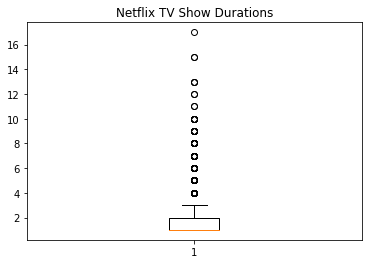

In [11]:
# Create a boxplot of the number of seasons
plt.boxplot(df['seasons'])
plt.title('Netflix TV Show Durations')
plt.show()

Most shows are two seasons or less in this data. This may be due to shows that are still being produced. During the analysis the impact of such shows will have to be explored.

### Average Show Duration by Year

In [12]:
# Build averages by year
yearly_ave = df.groupby('release_year', as_index=False)['seasons'].mean()
yearly_ave

,release_year,seasons
0,1925,1.000000
1,1945,1.000000
2,1946,1.000000
3,1963,4.000000
4,1967,8.000000
5,1972,1.000000
6,1974,4.000000
7,1977,10.000000
8,1979,1.000000
9,1981,1.000000


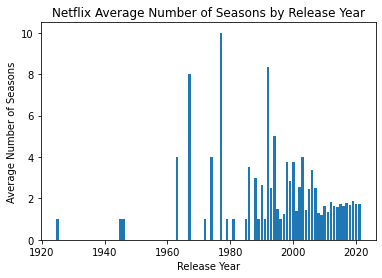

In [13]:
# Create a bar Chart of the yearly averages
plt.bar(yearly_ave['release_year'], yearly_ave['seasons'])
plt.xlabel('Release Year')
plt.ylabel('Average Number of Seasons')
plt.title('Netflix Average Number of Seasons by Release Year')
plt.show()

This final chart displays the change in the average number of seasons over time. 

# Project Milestone 2: Data Preparation

## Remove unneeded features

The following features will be removed:
<ul>
    <li> show_id - an identifier, other unique fields exist (title)
    <li> type - after the initial sort, this field only contains "TV Show"
    <li> listed_in - the netflix category will not be used in this analysis
    <li> rating - as seen earlier in the analysis, this field has no correlation with the number of seasons
    <li> duration - this field is now a duplicate of "seasons"


In [14]:
# Utilize the drop function to remove the unneeded columns
df = df.drop(['show_id', 'type', 'listed_in', 'rating', 'duration'], axis=1)

# Validate the transformation was successful
df.head()

,title,director,cast,country,date_added,release_year,description,seasons
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,"After crossing paths at a party, a Cape Town t...",2
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,To protect his family from a powerful drug lor...,1
3,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,"Feuds, flirtations and toilet talk go down amo...",1
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,In a city of coaching centers known to train I...,2
5,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,The arrival of a charismatic young priest brin...,1


# Drop shows released in the current year
Since the number of seasons for shows that are currently running will be inaccurate, any shows released in the same year as the dataset will be dropped (2021)

In [15]:
# Grab all rows where release_year is not equal to 2021
df = df[df.release_year != 2021]

# Validate the transformation
df['release_year'].unique()

array([2020, 2018, 2014, 1994, 2015, 2013, 2019, 2017, 2016, 2012, 1992,
       2002, 2009, 2011, 2005, 2008, 2010, 2007, 2001, 2006, 1993, 1997,
       2003, 1945, 1999, 1998, 2000, 2004, 1986, 1995, 1925, 1972, 1974,
       1988, 1991, 1977, 1979, 1990, 1996, 1981, 1946, 1985, 1967, 1989,
       1963], dtype=int64)

## Clean the descriptions

In this section the following steps will be applied to the movie descriptions
<ul>
    <li> Text will be cleaned removing punctuation and excess whitespace
    <li> The text will be tokenized and any stop words will be removed
    <li> NLTK's PorterStemmer will be applied

In [16]:
# Load libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a function to clean the text
def clean_text(text):
    """
    Remove punctuations and special characters, makes lower case
    Args: text 
    Output: text
    """    
    text=text.lower() #makes text lowercase
    text=re.sub('\\d|\\W+|_',' ',text) #removes extra white space
    text=re.sub('[^a-zA-Z0-9]'," ", text) #removes any non-alphanumeric characters
    
    return text

# Define a function to remove any stop words and tokenize
def tokenize_and_remove_stop_words(txt):
    """
    takes in a sentence, tokenizes the words into a list,
    and then removes stop words from the tokenized list
    """
    #import the nltk package for tokenizing and removing stop words
    import nltk
    from nltk.tokenize import word_tokenize
    #Note: You may have to run this next commmand to download the NLTK 'punkt' library for the first time
    #nltk.download('punkt')
    from nltk.corpus import stopwords
    #Note: You may need to run this next command to download stopwords for the first time
    #nltk.download('stopwords')
    stop_words = stopwords.words('english')
    
    txt_token = word_tokenize(txt)
    txt_no_stopwords = [word for word in txt_token if word not in stop_words]
    
    return txt_no_stopwords

# Define a function to stem the words
def stem_text(word_list):
    from nltk.stem.porter import PorterStemmer
    porter = PorterStemmer()
    
    return [porter.stem(word) for word in word_list]

In [17]:
# Obtain a dataframe with only the descriptions and number of seasons
df_desc_preprocessed = df[['seasons', 'description']]

# View the dataframe
df_desc_preprocessed

,seasons,description
17,2,Strangers Diego and Isabel flee their home in ...
21,5,When a good deed unwittingly endangers his cla...
32,3,Insecure Otis has all the answers when it come...
34,1,Tayo speeds into an adventure when his friends...
37,1,"Birds Red, Chuck and their feathered friends h..."
...,...,...
8795,2,Now that he's discovered the Pendulum Summonin...
8796,2,"During the Mongol invasions, Yunus Emre leaves..."
8797,3,Teen surfer Zak Storm is mysteriously transpor...
8800,1,"Strong-willed, middle-class Kashaf and carefre..."


In [18]:
# Apply the clean_text function
df_desc_preprocessed['desc_clean'] = df_desc_preprocessed['description'].apply(clean_text)

# Apply the tokenize_and_remove_stop_words function
df_desc_preprocessed['desc_tokenized'] = df_desc_preprocessed['desc_clean'].apply(tokenize_and_remove_stop_words)

# Apply the stem_text function
df_desc_preprocessed['desc_stemmed'] = df_desc_preprocessed['desc_tokenized'].apply(stem_text)

# Put the text back together (untokenize)
df_desc_preprocessed['desc_final'] = df_desc_preprocessed['desc_stemmed'].apply(lambda text: ' '.join(text))

# View the pre-processed text
print(df_desc_preprocessed.shape)
df_desc_preprocessed.head()

<ipython-input-18-f7570e35b11b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc_preprocessed['desc_clean'] = df_desc_preprocessed['description'].apply(clean_text)
<ipython-input-18-f7570e35b11b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc_preprocessed['desc_tokenized'] = df_desc_preprocessed['desc_clean'].apply(tokenize_and_remove_stop_words)


(2361, 6)


<ipython-input-18-f7570e35b11b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc_preprocessed['desc_stemmed'] = df_desc_preprocessed['desc_tokenized'].apply(stem_text)
<ipython-input-18-f7570e35b11b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc_preprocessed['desc_final'] = df_desc_preprocessed['desc_stemmed'].apply(lambda text: ' '.join(text))


,seasons,description,desc_clean,desc_tokenized,desc_stemmed,desc_final
17,2,Strangers Diego and Isabel flee their home in ...,strangers diego and isabel flee their home in ...,"[strangers, diego, isabel, flee, home, mexico,...","[stranger, diego, isabel, flee, home, mexico, ...",stranger diego isabel flee home mexico pretend...
21,5,When a good deed unwittingly endangers his cla...,when a good deed unwittingly endangers his cla...,"[good, deed, unwittingly, endangers, clan, th,...","[good, deed, unwittingli, endang, clan, th, ce...",good deed unwittingli endang clan th centuri t...
32,3,Insecure Otis has all the answers when it come...,insecure otis has all the answers when it come...,"[insecure, otis, answers, comes, sex, advice, ...","[insecur, oti, answer, come, sex, advic, thank...",insecur oti answer come sex advic thank therap...
34,1,Tayo speeds into an adventure when his friends...,tayo speeds into an adventure when his friends...,"[tayo, speeds, adventure, friends, get, kidnap...","[tayo, speed, adventur, friend, get, kidnap, e...",tayo speed adventur friend get kidnap evil mag...
37,1,"Birds Red, Chuck and their feathered friends h...",birds red chuck and their feathered friends ha...,"[birds, red, chuck, feathered, friends, lots, ...","[bird, red, chuck, feather, friend, lot, adven...",bird red chuck feather friend lot adventur gua...


## Create final data set

In [195]:
# Create empty data frame
df_final = pd.DataFrame()

In [196]:
# Add seasons to the final data frame
df_final['Seasons'] = df_desc_preprocessed['seasons']

# Add the release year to the data frame
df_final['Release Year'] = df['release_year']

# Add the final description to the data frame
df_final['Description'] = df_desc_preprocessed['desc_final']

In [197]:
# View the dataframe
df_final.head()

,Seasons,Release Year,Description
17,2,2020,stranger diego isabel flee home mexico pretend...
21,5,2018,good deed unwittingli endang clan th centuri t...
32,3,2020,insecur oti answer come sex advic thank therap...
34,1,2020,tayo speed adventur friend get kidnap evil mag...
37,1,2018,bird red chuck feather friend lot adventur gua...


## Split this into a training and test set

In [198]:
# Split into training & test sets

# Import library
from sklearn.model_selection import train_test_split

x = df_final[['Description', 'Release Year']]
y = df_final['Seasons']

# Create training & test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

## Fit and apply the tf-idf vectorization to the training set

In [199]:
# Establish TFIDFVectorizer
v = TfidfVectorizer()

# Fit & transform the description in the x_train data
tfidf_xtrain = v.fit_transform(x_train['Description'])

# Create a dataframe for the x_train tfidf vectorization
x_train_tfidf = pd.DataFrame(tfidf_xtrain.toarray(), columns=v.get_feature_names())

## Apply the tf-idf vectorization to the test set

In [200]:
# Apply the tf-idf vectorization
tfidf_xtest = v.transform(x_test['Description'])

# Create a dataframe for the x_test tfidf vectorization
x_test_tfidf = pd.DataFrame(tfidf_xtest.toarray(), columns=v.get_feature_names())

In [201]:
# The descriptions can now be dropped in both test and train datasets
x_test = x_test.drop(['Description'], axis=1)
x_train = x_train.drop(['Description'], axis=1)

In [202]:
# Obtain column names
tfidf_headers = x_test_tfidf.columns
x_headers = x_train.columns

# Remove indexes
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
x_train_tfidf.reset_index(drop=True, inplace=True)
x_test_tfidf.reset_index(drop=True, inplace=True)

# Add column names
x_train.columns = x_headers
x_test.columns = x_headers
x_train_tfidf.columns = tfidf_headers
x_test_tfidf.columns = tfidf_headers

In [204]:
# Merge the two train dataframes
x_train = pd.concat([x_train, x_train_tfidf], axis=1)
x_test = pd.concat([x_test, x_test_tfidf], axis=1)

# Project Milestone 3: Model Building and Evaluation

KNN will be the first model to be evaluated. This model was selected first since the dataset contains descriptions and release dates. The assumption with the first model is that whats popular (more likely to have multiple seasons) will change over time and grouping like shows together may allow for a better prediction.

Note: Project milestone 2 has been updated to include the release year and transform the tfidf vectorization matrix into a dataframe

In [208]:
# Load libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV

# Create standardizer
standardizer = StandardScaler()

# Standardize features
x_train = standardizer.fit_transform(x_train)
x_test = standardizer.transform(x_test)

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)

# Create a pipeline
pipe = Pipeline([("standardizer", standardizer), ("knn", knn)])

In [210]:
# Fit the pipeline
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardizer', StandardScaler()),
                ('knn', KNeighborsClassifier(n_jobs=-1, n_neighbors=4))])

In [211]:
# Load libraries
from sklearn.metrics import accuracy_score

# Build predictions
pipe_pred = pipe.predict(x_test)

# Calculate accuracy
accuracy_score(y_test, pipe_pred)

0.6871035940803383

The first model is 69% accurate. Next a better fit for the number of neighbors will be explored

In [212]:
# Create a search space for the number of neighbors
search_space = [{"knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                                     18, 19, 20, 21, 22, 23, 24, 25]}]

In [213]:
# Create grid search
classifier = GridSearchCV(pipe, search_space, cv=5, verbose=0).fit(x_train, y_train)

C:\Users\wittl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [214]:
# Find the best value
classifier.best_estimator_.get_params()["knn__n_neighbors"]

7

In [215]:
# Build predictions
classifier_pred = classifier.predict(x_test)

# Calculate accuracy
accuracy_score(y_test, classifier_pred)

0.6892177589852009

The better fit for the number of neighbors (7) only improved the model by .2%. 

Next logistic regression and random forest models will be evaluated.

In [216]:
# Load libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Build new search space
search_space2 = [{"classifier": [LogisticRegression()], 
                  "classifier__penalty": ['l2'],
                  "classifier__C": np.logspace(0, 4, 10)}, 
                 {"classifier": [RandomForestClassifier()], 
                  "classifier__n_estimators": [10, 100, 1000], 
                  "classifier__max_features": [1, 2, 3]}]

# Build new pipeline
pipe2 = Pipeline([("classifier", RandomForestClassifier())])

# Fit the pipeline
pipe2.fit(x_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier())])

In [220]:
# Create grid search
classifier2 = GridSearchCV(pipe2, search_space2, cv=5, verbose=0, n_jobs=-1).fit(x_train, y_train)

C:\Users\wittl\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [221]:
# View the best model
classifier2.best_estimator_.get_params()["classifier"]

RandomForestClassifier(max_features=3)

In [223]:
# Build predictions
classifier2_pred = classifier2.predict(x_test)

# Calculate accuracy
accuracy_score(y_test, classifier2_pred)

0.6892177589852009

The random forest model is equally as accurate as the KNN model. However, with the vast amount of shows that only last for one season, the models found that the best solution is to predict one season for all shows. Due to this the model is not successful in predicting when a show will last for more than a season. Additional data is needed for exploration for a new model.

In [236]:
np.unique(classifier_pred)

array([1])